In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [49]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [50]:
train_data.columns.difference(test_data.columns).tolist()

['Class']

In [51]:
train_data = train_data.drop(columns='Id')
test_data = test_data.drop(columns='Id')

In [52]:
train_data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

In [54]:
y_train.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Class, dtype: float64

In [55]:
train_data['EJ'].unique()

array(['B', 'A'], dtype=object)

In [56]:
# Preprocessing categorical features

train_data = pd.get_dummies(train_data, columns =["EJ"],  drop_first=False).drop(columns=['EJ_B'])
test_data = pd.get_dummies(test_data, columns =["EJ"],  drop_first=False)
features = list(train_data.columns)
columns = list(train_data.columns)

In [18]:
columns.remove('EJ_A')

In [25]:
train_data.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR',
       'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class', 'EJ_A'],
      dtype='object')

In [26]:
test_data.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR',
       'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'EJ_A'],
      dtype='object')

In [27]:
train_data.columns.difference(test_data.columns).tolist()

['Class']

In [112]:
train_data.isnull().sum().sum()

130

In [265]:
train_data.shape

(617, 57)

In [266]:
test_data.shape

(5, 57)

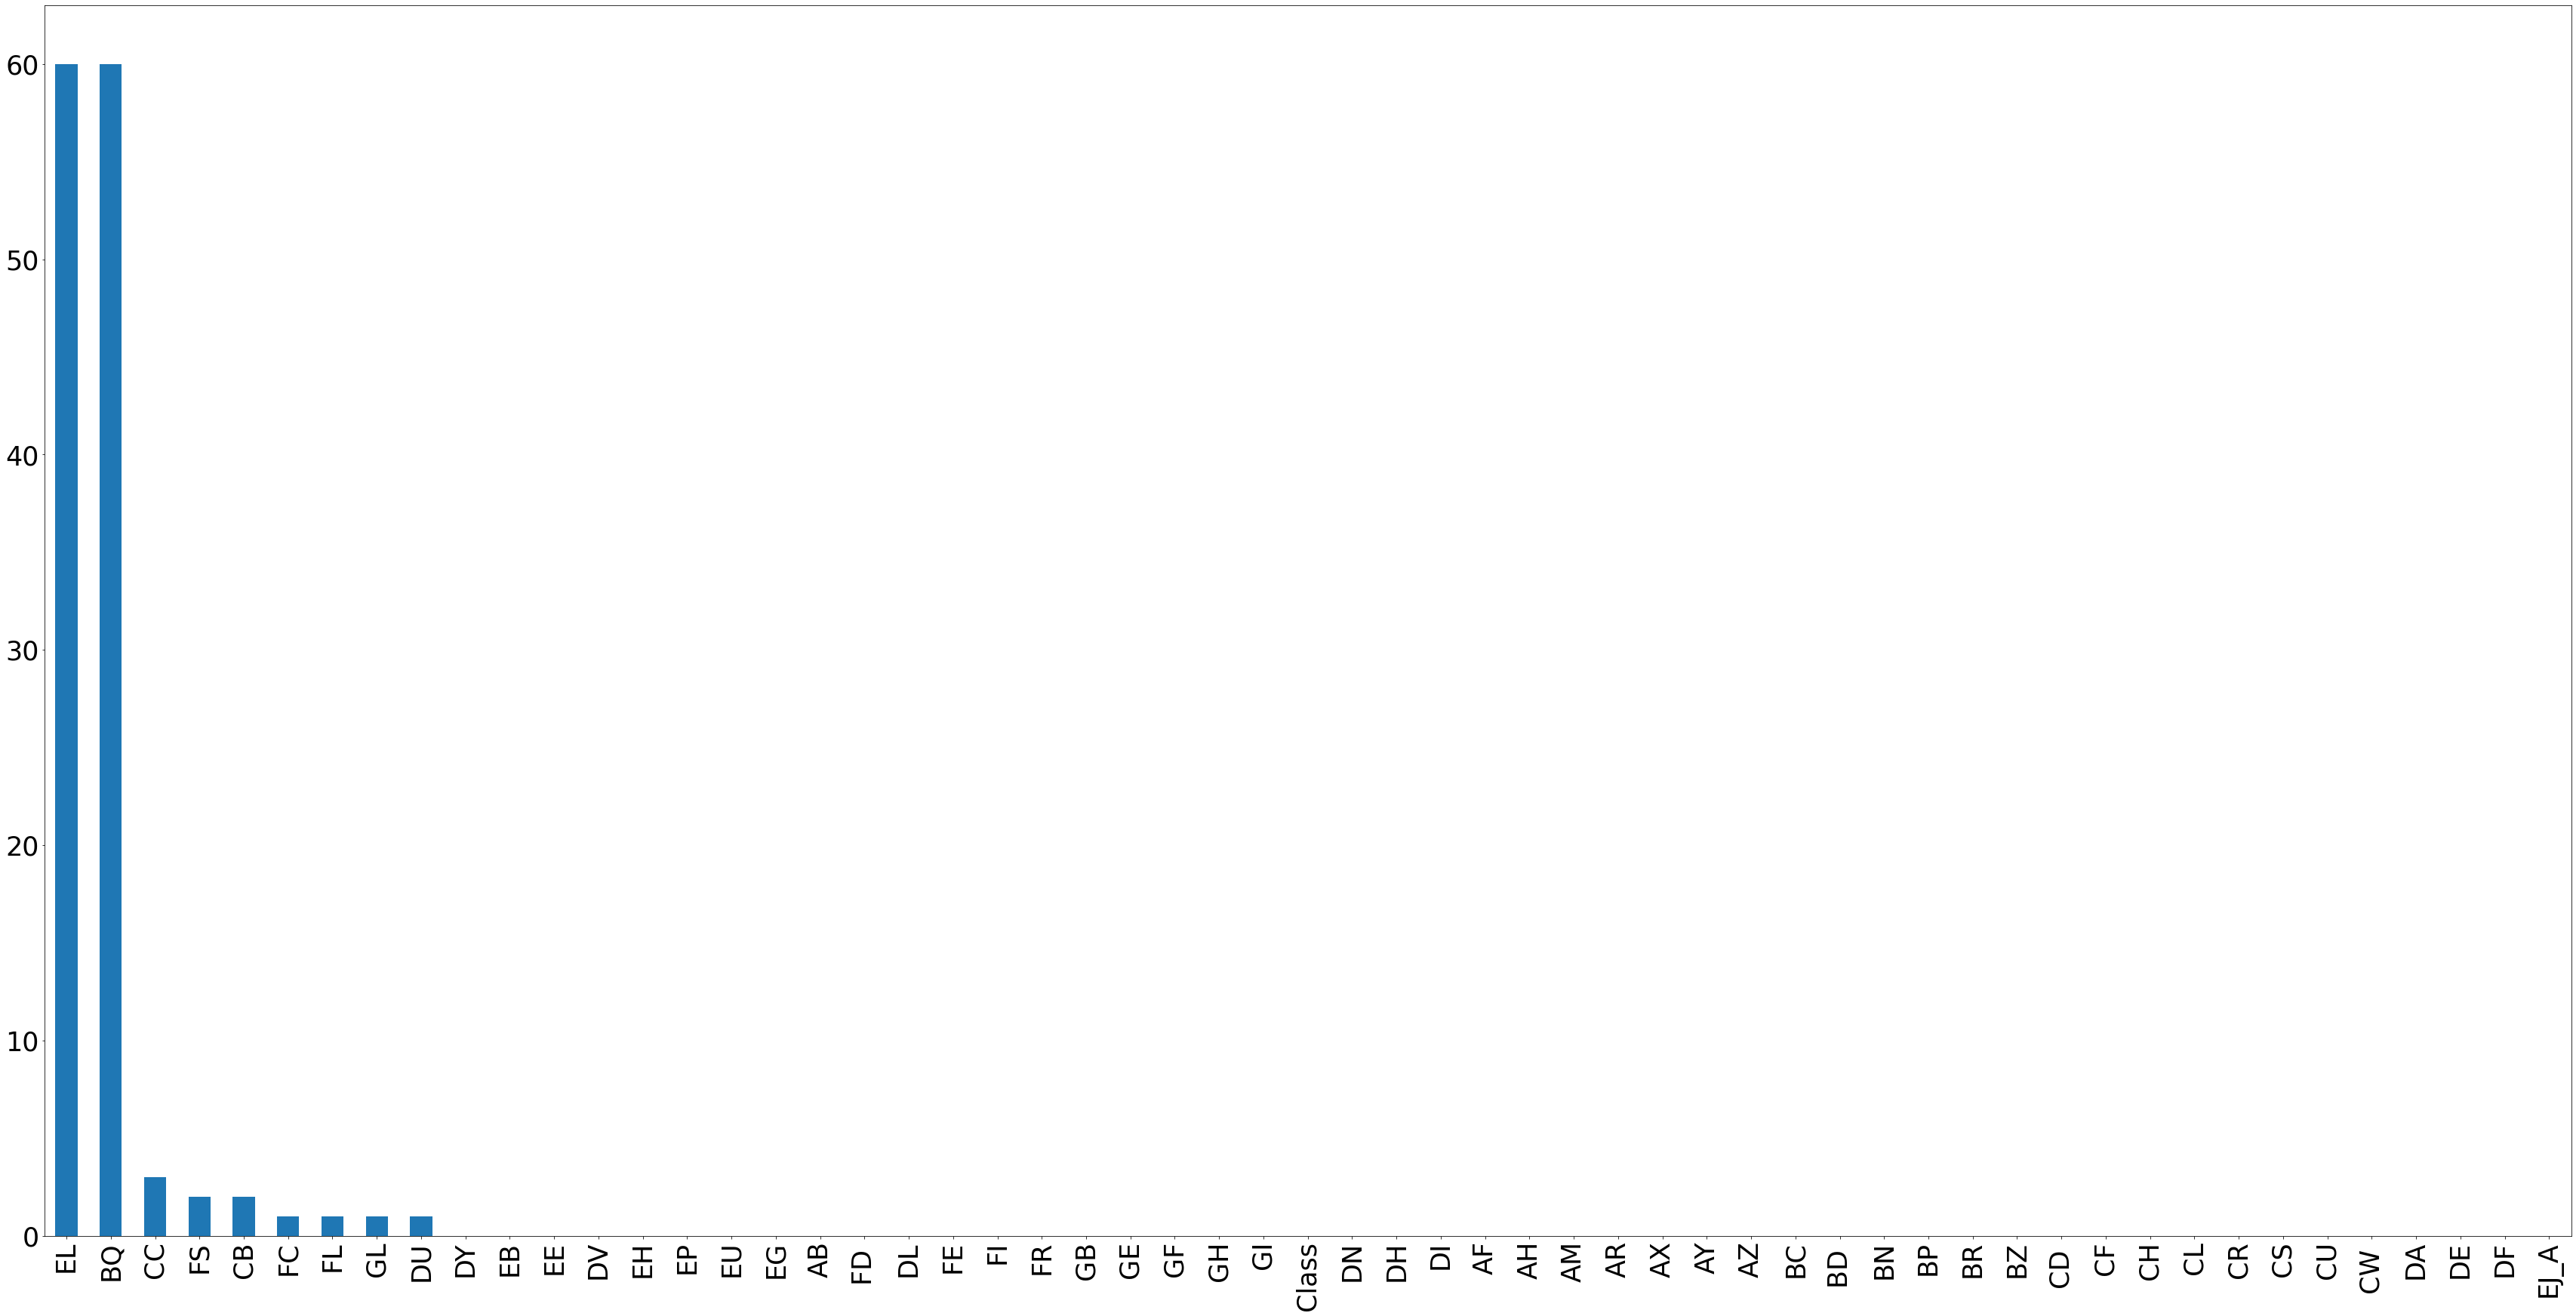

In [57]:
# Missing Data

plt.figure(figsize=(60,30))
train_data.isnull().sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=90, fontsize=35)
plt.yticks(fontsize=35)
plt.show()

In [58]:
# Removing Outliers
for column in columns:
    
  
    std = train_data[column].std()
    mean = train_data[column].mean()

    cut_off = 3 * std

    lower, upper = mean - cut_off, mean + cut_off

    train_data_filt = train_data[(train_data[column] < upper) & (train_data[column] > lower)]



In [59]:
# Imputing data using Median

imputer = SimpleImputer(strategy='median')
train_data = imputer.fit_transform(train_data_filt)


train_data = pd.DataFrame(train_data, columns=features)


In [60]:
y_train = train_data.loc[:,"Class"]
X_train = train_data.drop(columns='Class')
X_test = test_data

features = list(X_train.columns)
columns = list(X_train.columns)

In [ ]:
''' for column in columns:
    lower = train_data[column].quantile(0.01)
    upper  = test_data[column].quantile(0.99)
    
    train_data_filt = train_data[(train_data[column] < upper) & (train_data[column] > lower)] '''

In [61]:
scaler = MinMaxScaler()

In [62]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)